In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import warnings

#ignore by message
warnings.filterwarnings("ignore")

# Creando AlexNet

In [13]:
np.random.seed(1000)

#Declaración
AlexNet = Sequential()

#Todos los valores corresponden a la Arquitectura Interna de como trabaja AlexNet

#Capa Convolucional 1
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Capa Convolucional 2
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Capa Convolucional 3
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#Capa Convolucional 4
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#Capa Convolucional 5
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Se convierte a una capa completamente conectada
AlexNet.add(Flatten())

# Capa completamente conectada 1
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Dropout (evita el Overfitting)
AlexNet.add(Dropout(0.4))

# Capa completamente conectada 2
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

# Capa completamente conectada 3
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Capa de salida
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [14]:
#Compilamos el modelo
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

# Usamos el dataset Cifar 10

In [15]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

#Realizamos el train_test_split 
#20% para Test y 80% para entrenamiento
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Vemos las dimensiones del dataset
print("Dimensiones de entrenamiento: ",(x_train.shape,y_train.shape))
print("Dimensiones de validación: ",(x_val.shape,y_val.shape))
print("Dimensiones de testeo: ",(x_test.shape,y_test.shape))


Dimensiones de entrenamiento:  ((35000, 32, 32, 3), (35000, 1))
Dimensiones de validación:  ((15000, 32, 32, 3), (15000, 1))
Dimensiones de testeo:  ((10000, 32, 32, 3), (10000, 1))


## Aplicamos el One Hot Enconding

In [16]:
#Aplicamos el One Hot Enconding para las variables (y_train, y_val y y_test) ya que el dataset contiene 10 outputs distintos
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Volvemos a verificar las dimensiones del dataset
print("Dimensiones de entrenamiento: ",(x_train.shape,y_train.shape))
print("Dimensiones de validación: ",(x_val.shape,y_val.shape))
print("Dimensiones de testeo: ",(x_test.shape,y_test.shape))

Dimensiones de entrenamiento:  ((35000, 32, 32, 3), (35000, 10))
Dimensiones de validación:  ((15000, 32, 32, 3), (15000, 10))
Dimensiones de testeo:  ((10000, 32, 32, 3), (10000, 10))


## Se aplica Image Data Augmentation

In [17]:
#Con Image Data Generator se generan imagenes alteradas del dataset para mejorar su precisión
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [18]:
#Anulador de Learning Rate
#Esta función disminuirá el Learning Rate cuando el modelo deje de mostrar mejoras
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5) 

# Entrenando el modelo

In [19]:
#Parámetros
batch_size= 100 #100
epochs=10 #100
learn_rate=.001 #.001

In [20]:
AlexNet.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), 
                      epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, 
                      validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), 
                      validation_steps = 250, callbacks = [lrr], verbose=1)

Epoch 1/10
350/350 [==============================] - 579s 2s/step - loss: 1.6432 - accuracy: 0.4074 - val_loss: 2.1091 - val_accuracy: 0.2633 - lr: 0.0010
Epoch 2/10
350/350 [==============================] - 535s 2s/step - loss: 1.4006 - accuracy: 0.5058 - lr: 0.0010
Epoch 3/10
350/350 [==============================] - 536s 2s/step - loss: 1.2902 - accuracy: 0.5475 - lr: 0.0010
Epoch 4/10
350/350 [==============================] - 535s 2s/step - loss: 1.1883 - accuracy: 0.5851 - lr: 0.0010
Epoch 5/10
350/350 [==============================] - 534s 2s/step - loss: 1.1225 - accuracy: 0.6117 - lr: 0.0010
Epoch 6/10
350/350 [==============================] - 537s 2s/step - loss: 1.0634 - accuracy: 0.6329 - lr: 0.0010
Epoch 7/10
350/350 [==============================] - 531s 2s/step - loss: 1.0098 - accuracy: 0.6529 - lr: 0.0010
Epoch 8/10
350/350 [==============================] - 531s 2s/step - loss: 0.9688 - accuracy: 0.6683 - lr: 0.0010
Epoch 9/10
350/350 [==========================

# Gráfico de rendimiento

NameError: ignored

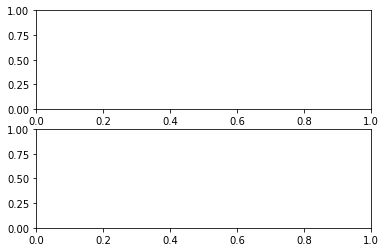

In [21]:
import matplotlib.pyplot as plt

#Plotting the training and validation loss
f,ax=plt.subplots(2,1)

print (history.history.keys())

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

## Función para la matriz de confusión

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    #Imprimiendo la Matriz de Confusión
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
#Usando AlexNet para y_pred y y_true
y_pred=np.argmax(AlexNet.predict(x_test), axis=-1)
y_true=np.argmax(y_test,axis=1)

#Imprimiendo la matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_mtx=confusion_matrix(y_true,y_pred)
confusion_mtx

### Matriz de confusión

In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

f,ax=plt.subplots(1,2)

ax[0].plot(plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization'))
ax[1].plot(plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix'))

# Mostrando Accuracy del modelo

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

# Curva ROC y AUC del modelo

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def predict_prob(number):
  return [number[0],1-number[0]]

#y_pred_prob = np.array(list(map(predict_prob, AlexNet.predict(x_test))))
#y_pred_prob = np.argmax(AlexNet.predict_proba(x_test), axis=-1)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc